In [59]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [4]:
salary=pd.read_csv(r"C:\Users\AJAY\Downloads\SalaryData_Train(1).csv")

In [5]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
salary.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:>

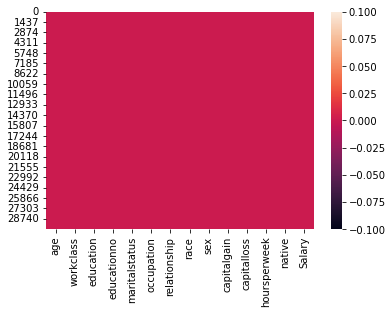

In [10]:
sns.heatmap(salary.isna())

In [11]:
salary[salary.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [12]:
salary=salary.drop_duplicates(ignore_index=True)
salary[salary.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [13]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
26899,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
26900,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
26901,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [60]:
labelencoder = LabelEncoder()
salary.iloc[:,-1] = labelencoder.fit_transform(salary.iloc[:,-1])
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,2,12,14,2,3,0,4,1,0,0,40,37,1
26899,22,2,15,10,4,10,1,4,1,0,0,40,37,0
26900,27,2,7,12,2,12,5,4,0,0,0,38,37,0
26901,58,2,11,9,6,0,4,4,0,0,0,40,37,0


In [15]:
salary['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [61]:
label_encoder = preprocessing.LabelEncoder()
salary['workclass']= label_encoder.fit_transform(salary['workclass'])
salary['education']= label_encoder.fit_transform(salary['education'])
salary['maritalstatus']= label_encoder.fit_transform(salary['maritalstatus'])
salary['occupation']= label_encoder.fit_transform(salary['occupation'])
salary['relationship']= label_encoder.fit_transform(salary['relationship'])
salary['race']= label_encoder.fit_transform(salary['race'])
salary['sex']= label_encoder.fit_transform(salary['sex'])
salary['native']= label_encoder.fit_transform(salary['native'])
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,2,12,14,2,3,0,4,1,0,0,40,37,1
26899,22,2,15,10,4,10,1,4,1,0,0,40,37,0
26900,27,2,7,12,2,12,5,4,0,0,0,38,37,0
26901,58,2,11,9,6,0,4,4,0,0,0,40,37,0


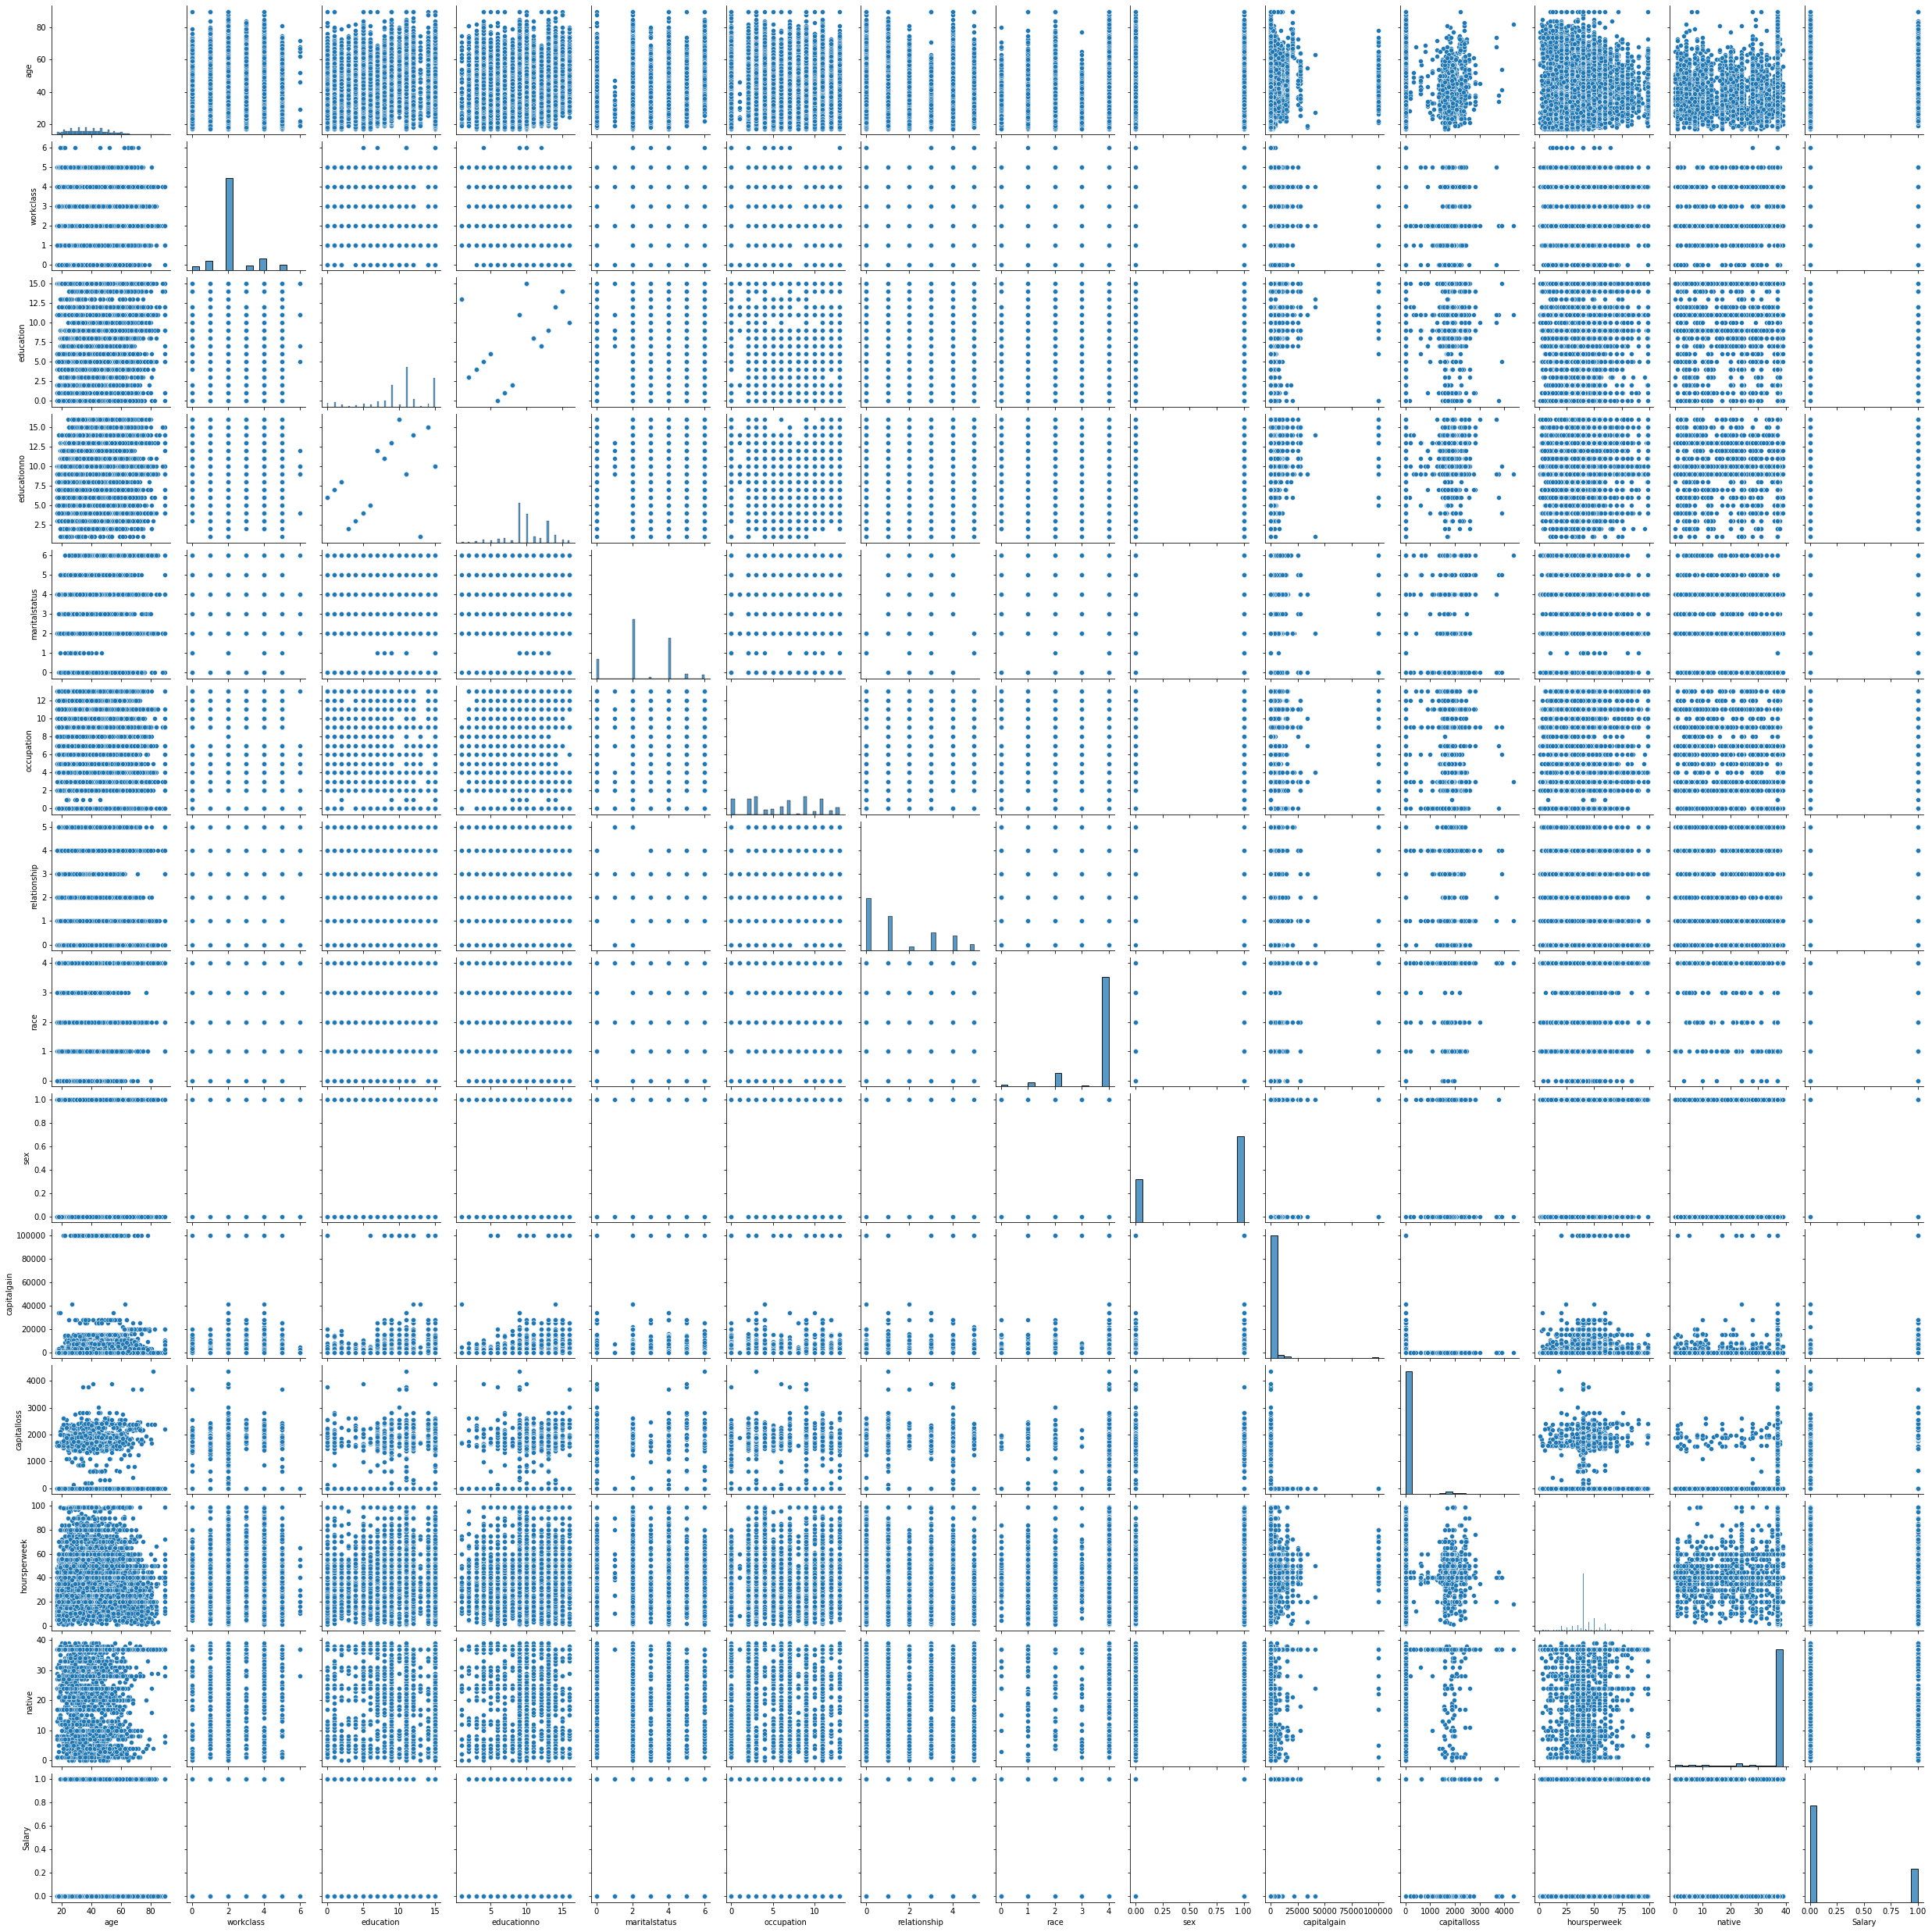

In [17]:
sns.pairplot(salary)

<AxesSubplot:>

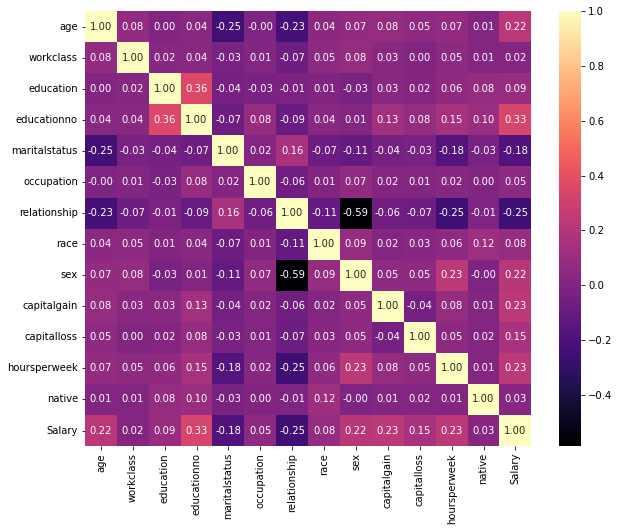

In [18]:
plt.figure(figsize = (10, 8));
sns.heatmap(salary.corr(), cmap='magma', annot=True, fmt=".2f")

In [19]:
salary1=pd.read_csv(r"C:\Users\AJAY\Downloads\SalaryData_Test(1).csv")

In [20]:
salary1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [21]:
salary1[salary1.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [22]:
salary1=salary1.drop_duplicates(ignore_index=True)
salary1[salary1.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [23]:
salary1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
14126,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
14127,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
14128,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [62]:
label_encoder = preprocessing.LabelEncoder()
salary1['workclass']= label_encoder.fit_transform(salary1['workclass'])
salary1['education']= label_encoder.fit_transform(salary1['education'])
salary1['maritalstatus']= label_encoder.fit_transform(salary1['maritalstatus'])
salary1['occupation']= label_encoder.fit_transform(salary1['occupation'])
salary1['relationship']= label_encoder.fit_transform(salary1['relationship'])
salary1['race']= label_encoder.fit_transform(salary1['race'])
salary1['sex']= label_encoder.fit_transform(salary1['sex'])
salary1['native']= label_encoder.fit_transform(salary1['native'])
salary1['Salary']= label_encoder.fit_transform(salary1['Salary'])
salary1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,2,9,13,4,9,3,4,1,0,0,40,37,0
14126,39,2,9,13,0,9,1,4,0,0,0,36,37,0
14127,38,2,9,13,2,9,0,4,1,0,0,50,37,0
14128,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [57]:
xtrain=salary.iloc[:,:-1]
ytrain=salary.iloc[:,-1]
xtest=salary1.iloc[:,:-1]
ytest=salary1.iloc[:,-1]

In [35]:
xtrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,2,12,14,2,3,0,4,1,0,0,40,37
26899,22,2,15,10,4,10,1,4,1,0,0,40,37
26900,27,2,7,12,2,12,5,4,0,0,0,38,37
26901,58,2,11,9,6,0,4,4,0,0,0,40,37


In [36]:
xtrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,2,12,14,2,3,0,4,1,0,0,40,37
26899,22,2,15,10,4,10,1,4,1,0,0,40,37
26900,27,2,7,12,2,12,5,4,0,0,0,38,37
26901,58,2,11,9,6,0,4,4,0,0,0,40,37


In [37]:
xtest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,2,9,13,4,9,3,4,1,0,0,40,37
14126,39,2,9,13,0,9,1,4,0,0,0,36,37
14127,38,2,9,13,2,9,0,4,1,0,0,50,37
14128,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [38]:
ytest

0        0
1        0
2        1
3        1
4        0
        ..
14125    0
14126    0
14127    0
14128    0
14129    1
Name: Salary, Length: 14130, dtype: int32

In [39]:

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((26903, 13), (26903,), (14130, 13), (14130,))

# Grid Search CV

In [40]:
clf = SVC()

parameters = {'kernel':['rbf'],
               'gamma':[10],
               'C':[0.01]}

gsv = GridSearchCV(clf, param_grid = parameters, cv=2)

gsv.fit(xtrain, ytrain)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.01], 'gamma': [10], 'kernel': ['rbf']})

In [41]:
gsv.best_params_

{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}

In [42]:
gsv.best_score_

0.7442664383338005

In [43]:
clf1=SVC()
parameters1={'kernel':['rbf'],
            'gamma':[5],
            'C':[1]}
gsv1=GridSearchCV(clf1,param_grid=parameters1,cv=2)

gsv1.fit(xtrain,ytrain)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1], 'gamma': [5], 'kernel': ['rbf']})

In [44]:
gsv1.best_params_

{'C': 1, 'gamma': 5, 'kernel': 'rbf'}

In [45]:
gsv1.best_score_

0.7342303856247385

In [46]:
clf2=SVC()

parameters2={'kernel':['rbf'],
            'gamma':[0.001],
            'C':[0.1]}
gsv2=GridSearchCV(clf2,param_grid=parameters2,cv=2)

gsv2.fit(xtrain,ytrain)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1], 'gamma': [0.001], 'kernel': ['rbf']})

In [47]:
gsv2.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}

In [48]:
gsv2.best_score_

0.8169349375569697

In [49]:
model=SVC(C=0.1,gamma=0.001)
model.fit(xtrain,ytrain)

SVC(C=0.1, gamma=0.001)

In [50]:
ypred=model.predict(xtest)

In [51]:
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
acc=accuracy_score(ytest,ypred)*100
print("accuracy",acc)

accuracy 82.2009907997169


In [53]:
confusion_matrix(ytest,ypred)

array([[10567,    53],
       [ 2462,  1048]], dtype=int64)

In [55]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     10620
           1       0.95      0.30      0.45      3510

    accuracy                           0.82     14130
   macro avg       0.88      0.65      0.67     14130
weighted avg       0.85      0.82      0.78     14130

